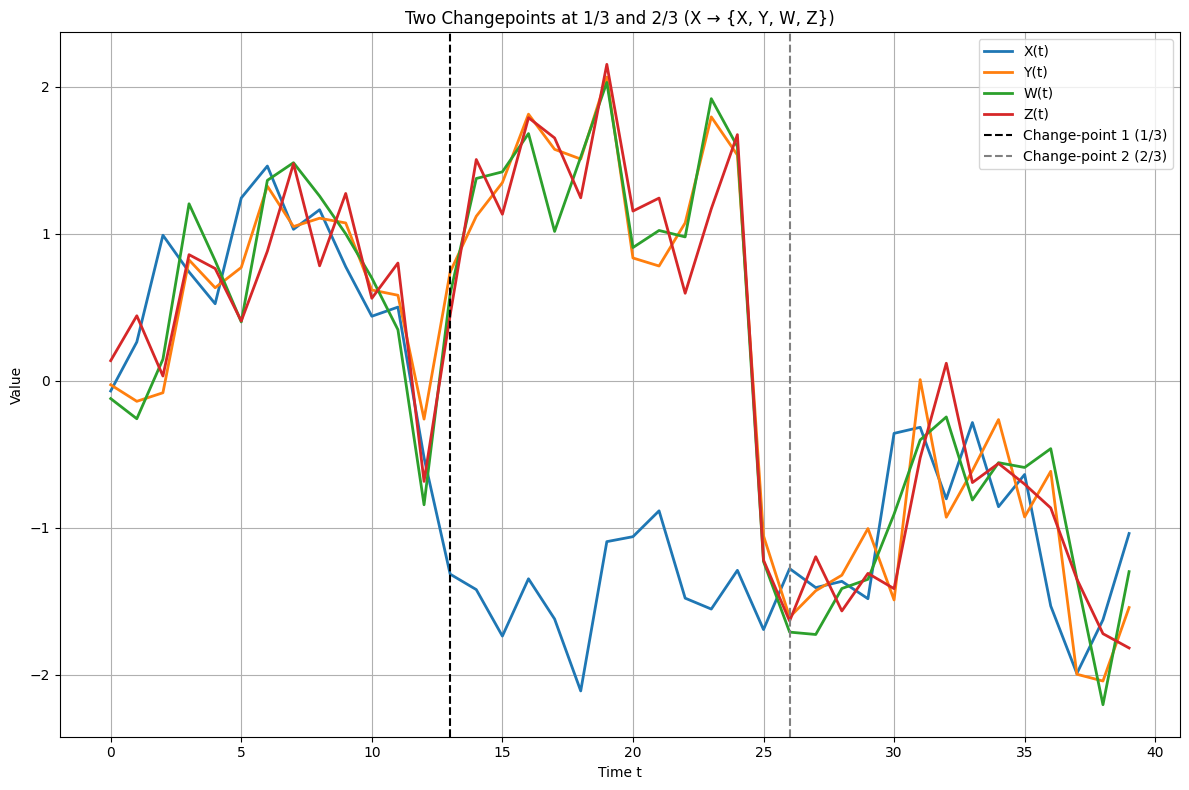

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def generate_4_node_dataset(m=40, epsilon=0.5, snr=5):
    """
    Generate a synthetic 4-node time series dataset based on the structure:
    X → X (autoregressive), X → Y, X → W, X → Z with changepoints in beta coefficients.

    Parameters:
    - m: Number of time steps (default = 40)
    - epsilon: Autoregressive noise strength for X
    - snr: Signal-to-noise ratio for Y, W, and Z

    Returns:
    - Time series for X, Y, W, Z (excluding t=0)
    - Corresponding beta coefficients for Y, W, Z
    - Changepoint indices cp1 and cp2
    """
    np.random.seed(42)  # Reproducibility

    # Initialize time series for all 4 nodes (length m+1)
    X = np.zeros(m+1)
    Y = np.zeros(m+1)
    W = np.zeros(m+1)
    Z = np.zeros(m+1)

    # Generate Gaussian noise for each variable
    phi_X = np.random.normal(0, 1, m+1)
    phi_Y = np.random.normal(0, 1, m+1)
    phi_W = np.random.normal(0, 1, m+1)
    phi_Z = np.random.normal(0, 1, m+1)

    # Define changepoints at 1/3 and 2/3 of the time series
    cp1 = m // 3
    cp2 = 2 * m // 3

    # Build piecewise beta coefficients (1 → -1 → 1) for Y, W, and Z
    def build_beta(m, cp1, cp2):
        beta = np.ones(m+1)
        beta[cp1:cp2] = -1
        return beta

    beta_Y = build_beta(m, cp1, cp2)
    beta_W = build_beta(m, cp1, cp2)
    beta_Z = build_beta(m, cp1, cp2)

    # Generate X using an AR(1) process
    for t in range(m):
        X[t+1] = np.sqrt(1 - epsilon**2) * X[t] + epsilon * phi_X[t+1]

    # Estimate signal strength for each child to compute noise scale c
    sigma_Y = np.std(beta_Y[1:] * X[1:])
    sigma_W = np.std(beta_W[1:] * X[1:])
    sigma_Z = np.std(beta_Z[1:] * X[1:])

    # Compute noise scale based on desired signal-to-noise ratio
    c_Y = sigma_Y / snr
    c_W = sigma_W / snr
    c_Z = sigma_Z / snr

    # Generate Y, W, Z using X as input with piecewise beta and added noise
    for t in range(m):
        Y[t+1] = beta_Y[t+1] * X[t] + c_Y * phi_Y[t+1]
        W[t+1] = beta_W[t+1] * X[t] + c_W * phi_W[t+1]
        Z[t+1] = beta_Z[t+1] * X[t] + c_Z * phi_Z[t+1]

    # Return time series and beta coefficients, excluding initial t=0
    return X[1:], Y[1:], W[1:], Z[1:], beta_Y[1:], beta_W[1:], beta_Z[1:], cp1, cp2

# Generate the dataset
X, Y, W, Z, beta_Y, beta_W, beta_Z, cp1, cp2 = generate_4_node_dataset()

# Plotting the dataset with changepoint markers
plt.figure(figsize=(12, 8))
plt.plot(X, label='X(t)', linewidth=2)
plt.plot(Y, label='Y(t)', linewidth=2)
plt.plot(W, label='W(t)', linewidth=2)
plt.plot(Z, label='Z(t)', linewidth=2)
plt.axvline(cp1, color='k', linestyle='--', label='Change-point 1 (1/3)')
plt.axvline(cp2, color='gray', linestyle='--', label='Change-point 2 (2/3)')
plt.title("Two Changepoints at 1/3 and 2/3 (X → {X, Y, W, Z})")
plt.xlabel("Time t")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
